# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame based on Mouse ID
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of unique mice
num_mice = combined_data["Mouse ID"].nunique()

# Display the number of unique mice
print(f"Number of unique mice: {num_mice}")


Number of unique mice: 249


In [4]:
# Get the Mouse ID(s) that have duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Get all the data for the duplicate mouse ID(s)
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate mouse ID(s)
duplicate_mouse_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get the Mouse ID(s) that have duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Create a clean DataFrame by filtering out the duplicate mouse ID(s)
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the clean data
cleaned_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of unique mice in the clean DataFrame
clean_num_mice = cleaned_data["Mouse ID"].nunique()

# Display the number of unique mice in the cleaned data
print(f"Number of unique mice after cleaning: {clean_num_mice}")



Number of unique mice after cleaning: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group by drug regimen and calculate summary statistics for the tumor volume
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    tumor_volume_variance=('Tumor Volume (mm3)', 'var'),
    tumor_volume_std=('Tumor Volume (mm3)', 'std'),
    tumor_volume_sem=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics DataFrame
summary_stats


,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method to generate summary statistics in a single line
advanced_summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)

# Display the advanced summary statistics DataFrame
advanced_summary_stats



,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

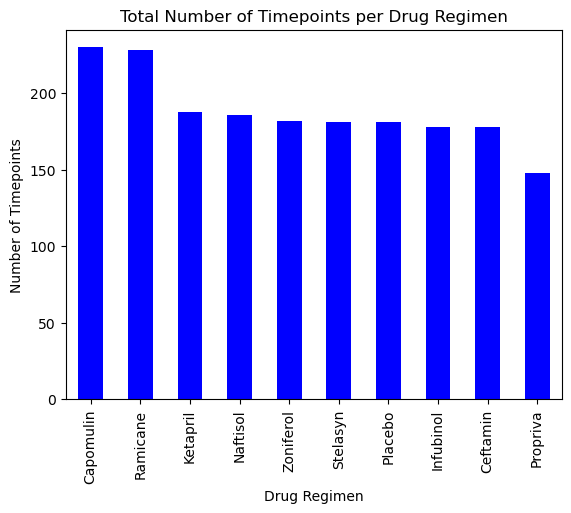

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', title='Total Number of Timepoints per Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Timepoints', color='blue')

# Display the plot
plt.show()


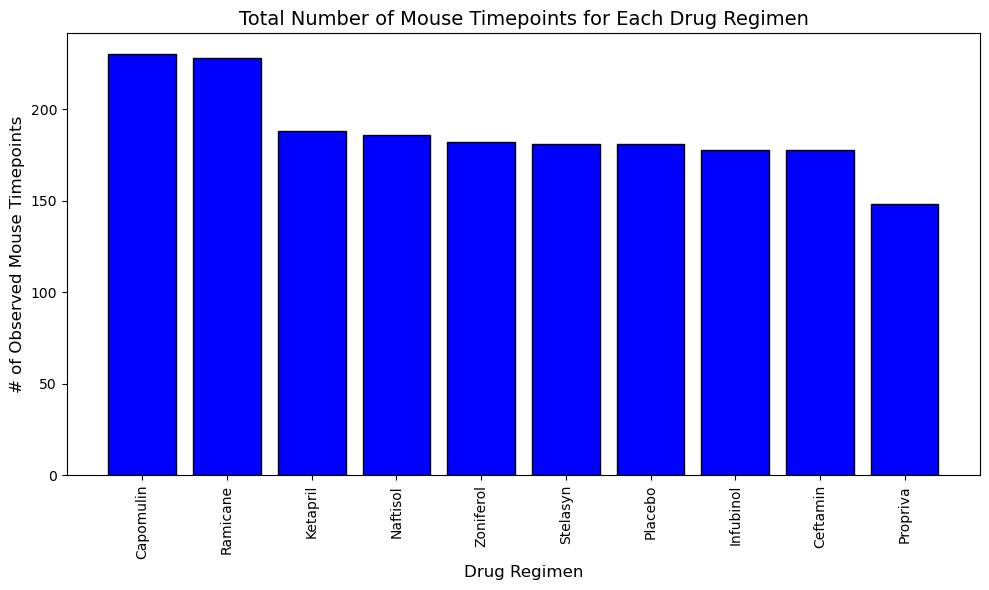

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.figure(figsize=(10,6))  # Set the figure size
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Total Number of Mouse Timepoints for Each Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label cutoffs
plt.show()


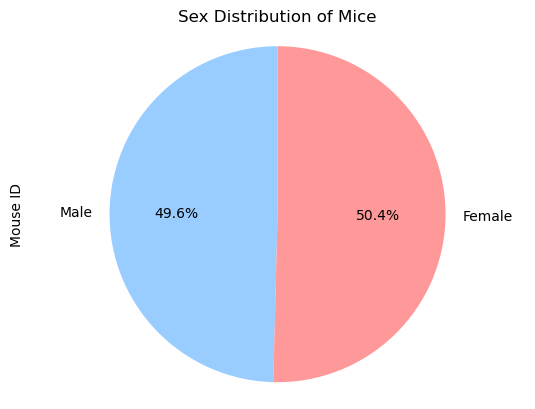

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = cleaned_data.groupby('Sex')['Mouse ID'].nunique()

# Plotting the pie chart using Pandas
gender_distribution.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         startangle=90, 
                         colors=['#99ccff', '#ff9999'],  # Light blue for male, light pink for female
                         labels=['Male', 'Female'],       
                         legend=False)                    

# Adding title for clarity
plt.title('Sex Distribution of Mice')

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the chart
plt.show()



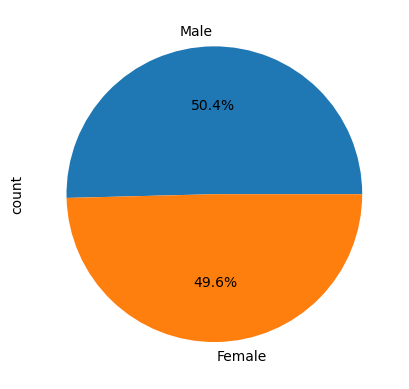

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Get the last timepoint for each mouse
last_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group dataframe with the original cleaned dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged dataframe for the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Display the filtered dataframe
final_tumor_volumes.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through the treatment list to calculate the IQR and find outliers
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list for plotting
    tumor_vol_data.append(drug_data)
    
    # Calculate the IQR
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine if there are any outliers in the dataset
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Print the drug name and any outliers found
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


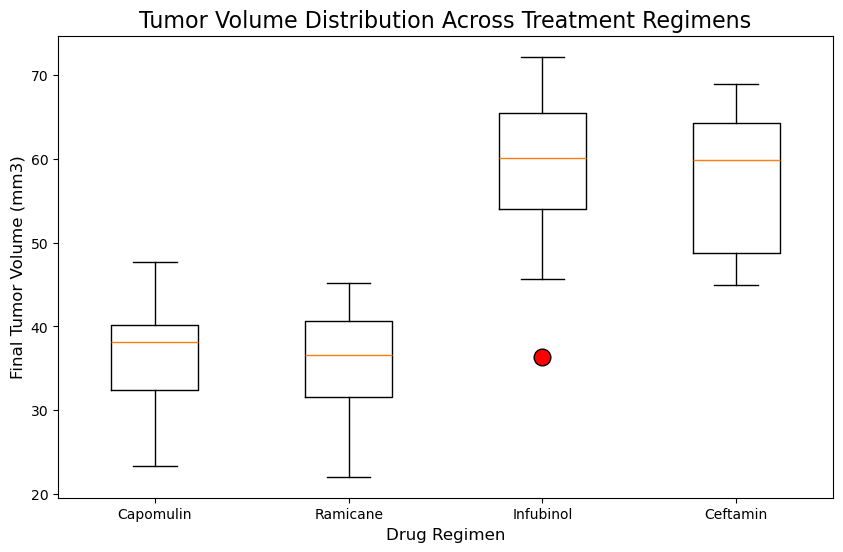

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot
ax.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none'))

# Set plot title and labels
ax.set_title('Tumor Volume Distribution Across Treatment Regimens', fontsize=16)
ax.set_xlabel('Drug Regimen', fontsize=12)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.show()


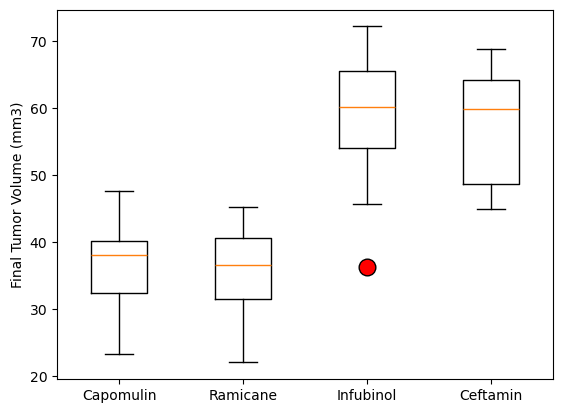

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [19]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Drop duplicate timepoints for a cleaner dataset
study_data_clean = study_data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"])


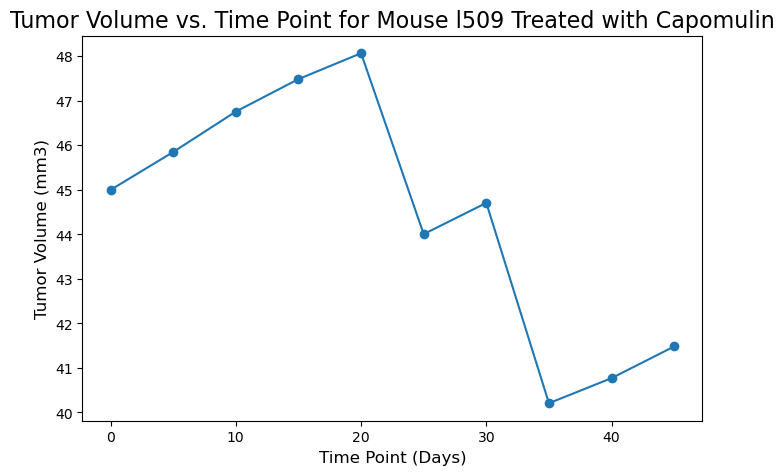

In [20]:
# Select a single mouse treated with Capomulin
mouse_id = "l509"  # Replace this with the actual mouse ID of interest

# Filter the data for this specific mouse
capomulin_mouse_data = study_data_clean.loc[(study_data_clean["Drug Regimen"] == "Capomulin") & (study_data_clean["Mouse ID"] == mouse_id)]

# Generate the line plot
plt.figure(figsize=(8, 5))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o')

# Set title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin", fontsize=16)
plt.xlabel("Time Point (Days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

# Show the plot
plt.show()


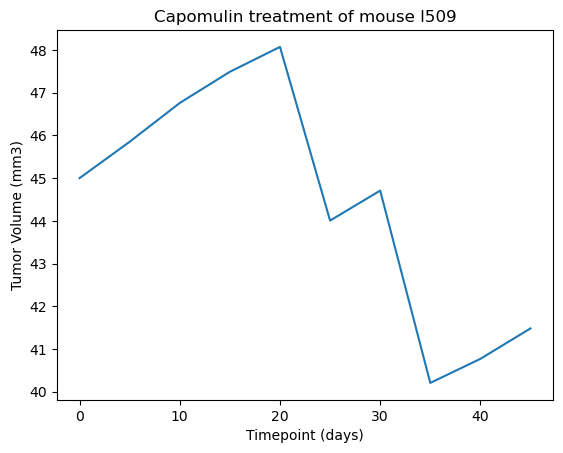

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


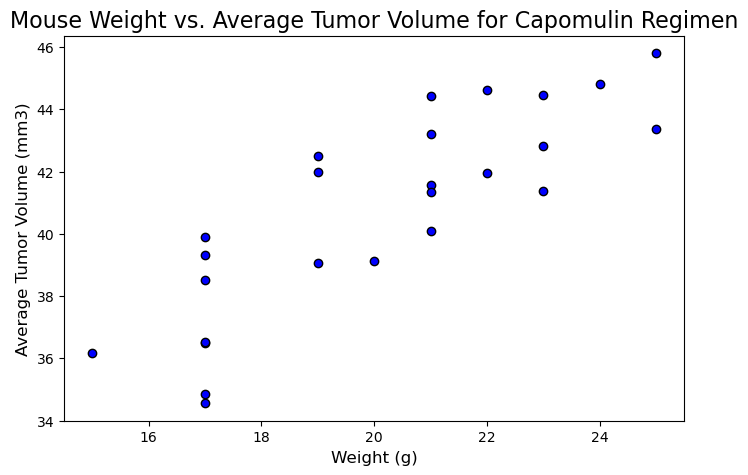

In [21]:
# Filter the data for the Capomulin regimen
capomulin_data = study_data_clean[study_data_clean["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume
capomulin_grouped = capomulin_data.groupby("Mouse ID").agg({
    "Weight (g)": "mean",  # Average weight per mouse
    "Tumor Volume (mm3)": "mean"  # Average tumor volume per mouse
}).reset_index()

# Generate the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"], color="blue", edgecolor="black")

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize=16)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

# Show the plot
plt.show()


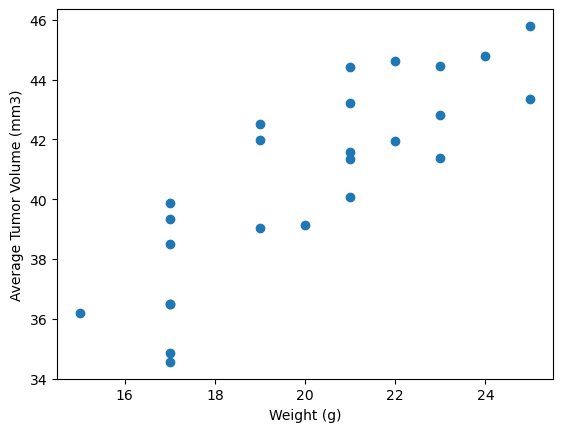

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


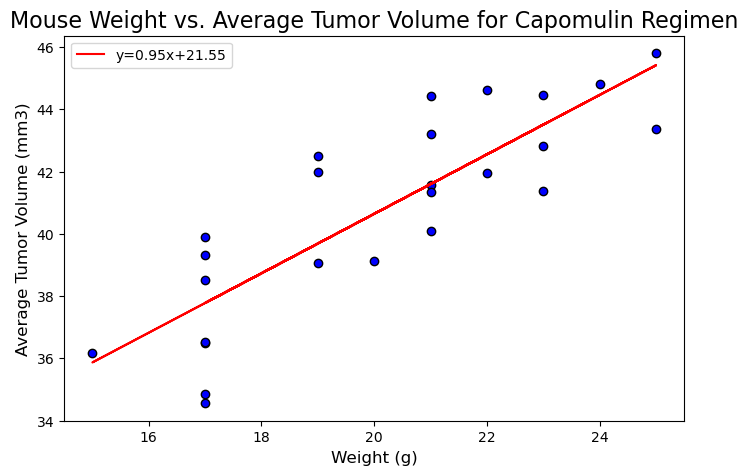

In [22]:
# Import the necessary module for linear regression
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"], color="blue", edgecolor="black")

# Plot the linear regression line
regress_values = capomulin_grouped["Weight (g)"] * slope + intercept
plt.plot(capomulin_grouped["Weight (g)"], regress_values, color="red", label=f"y={slope:.2f}x+{intercept:.2f}")

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize=16)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.legend()

# Show the plot
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


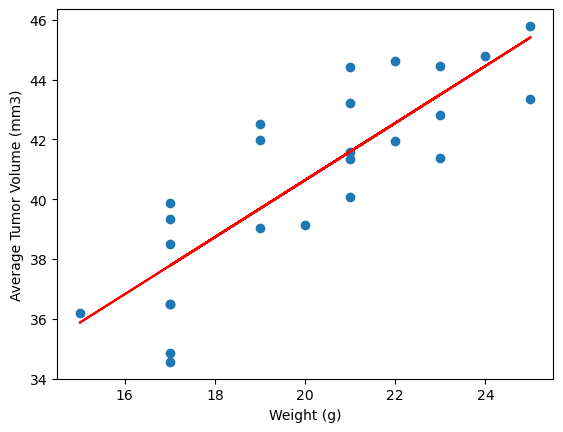

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
